<a href="https://colab.research.google.com/github/gautamrajoriya/CementPrediction_Model/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cement Compessive Strength Prediction Model**

In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset For Model Building...')

In [3]:
# Importing Dataset from Github to Local Machine
url = '/content/Concrete_Data.csv'


df = pd.read_csv(url)

df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
588,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,7,8.00
938,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
679,212.0,141.3,0.0,203.5,0.0,973.4,750.0,28,33.00
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
387,520.0,0.0,0.0,175.0,5.2,870.0,805.0,28,51.02
...,...,...,...,...,...,...,...,...,...
688,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
837,374.0,0.0,0.0,190.0,7.0,1013.0,730.0,28,39.05
906,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28,39.42
301,290.4,0.0,96.2,168.1,9.4,961.2,865.0,28,34.74


In [4]:
# Checking Data Columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

## **OLS Regression Analysis**

In [5]:
import statsmodels.api as sm
# Independent Columns
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
# Dependent Column : Target Column
y = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
X = sm.add_constant(X)

In [7]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Tue, 17 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      17:45:38   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# Evaluate y_pred i.e. Predicted Value
y_pred = model.predict(X)

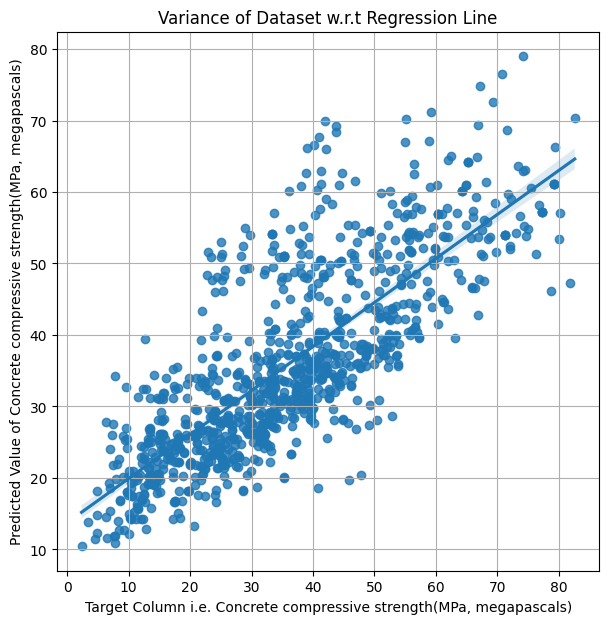

In [9]:
# Plot Regression
plt.figure(figsize = (7,7))
sns.regplot(x = y,y = y_pred)
plt.title('Variance of Dataset w.r.t Regression Line')
plt.xlabel('Target Column i.e. Concrete compressive strength(MPa, megapascals)')
plt.ylabel('Predicted Value of Concrete compressive strength(MPa, megapascals)')
plt.grid()
plt.show()

## **Exploratory Data Analysis**

In [10]:
# Checking Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
# Checking Descriptive Stats: EDA
# Univariate Analysis
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    # Saving all OrderedDict Dictionary into DataFrame : Structured format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


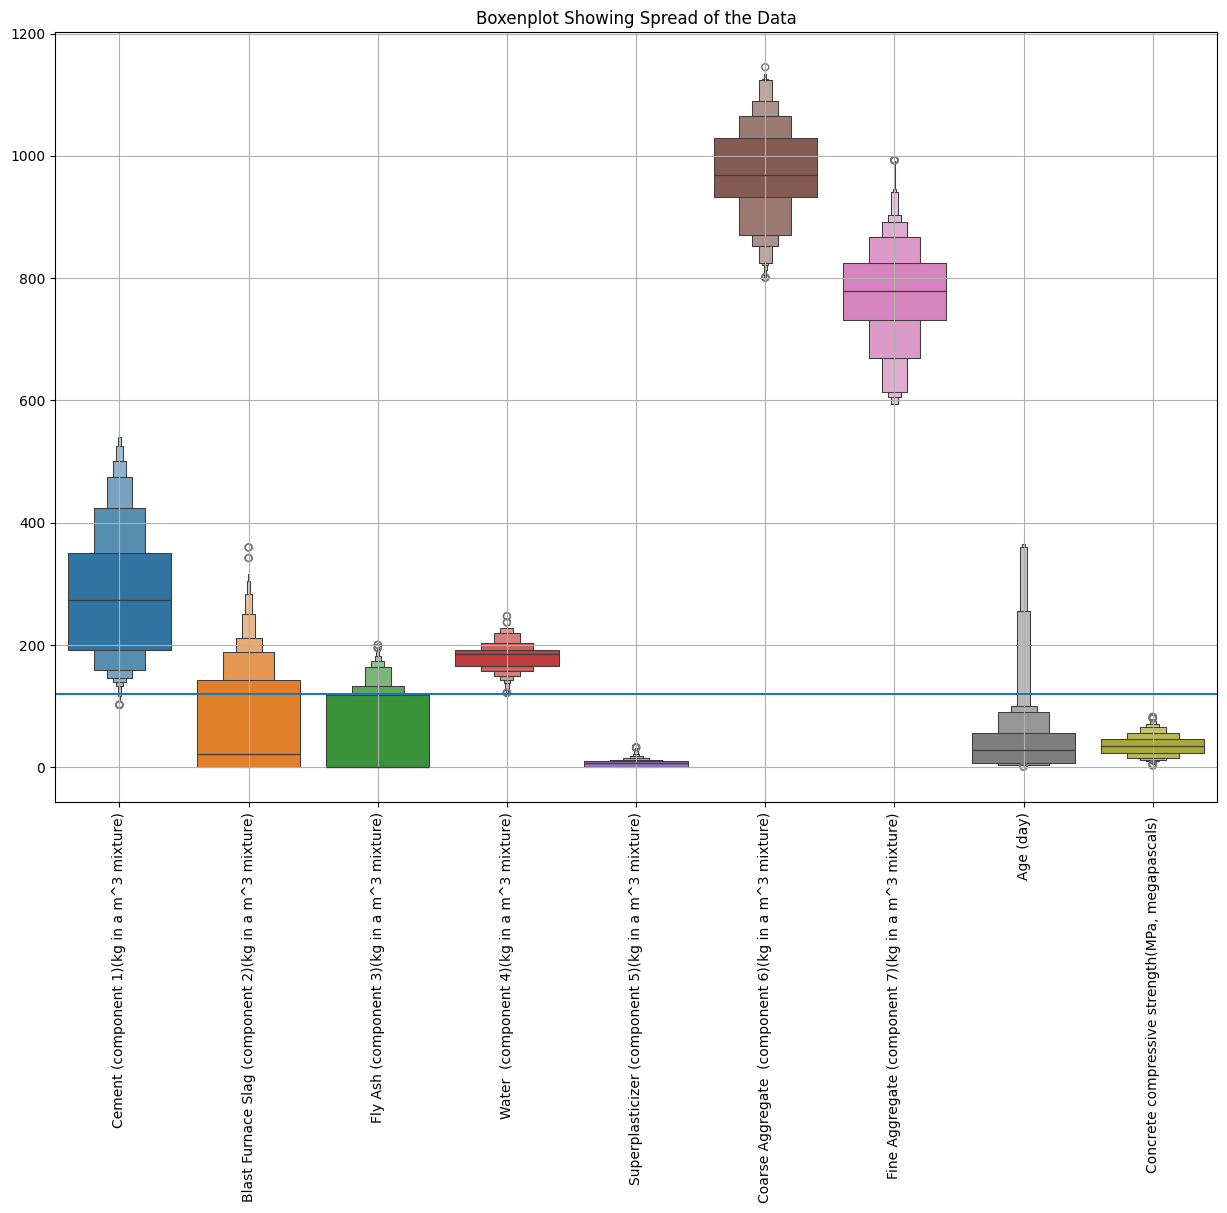

In [12]:
'''
Note:
1. Positive Kurtosis: LeptoKurtic
2. Normal Distribution : MesoKurtic
3. Negative Distribution: PlatyKurtic
......................................
1. Positive Skewness: mode<median<mean
2. No Skewness: Normally Distributed: mean = median = mode
3. Negative Skewness: mean<median<mode
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot Showing Spread of the Data')
plt.grid()
plt.show()

In [13]:
df['Cement_to_Water'] = df['Cement (component 1)(kg in a m^3 mixture)'] / df['Water  (component 4)(kg in a m^3 mixture)']

In [14]:
df['Composite'] = df['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']/ (df['Fly Ash (component 3)(kg in a m^3 mixture)'] + df['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])

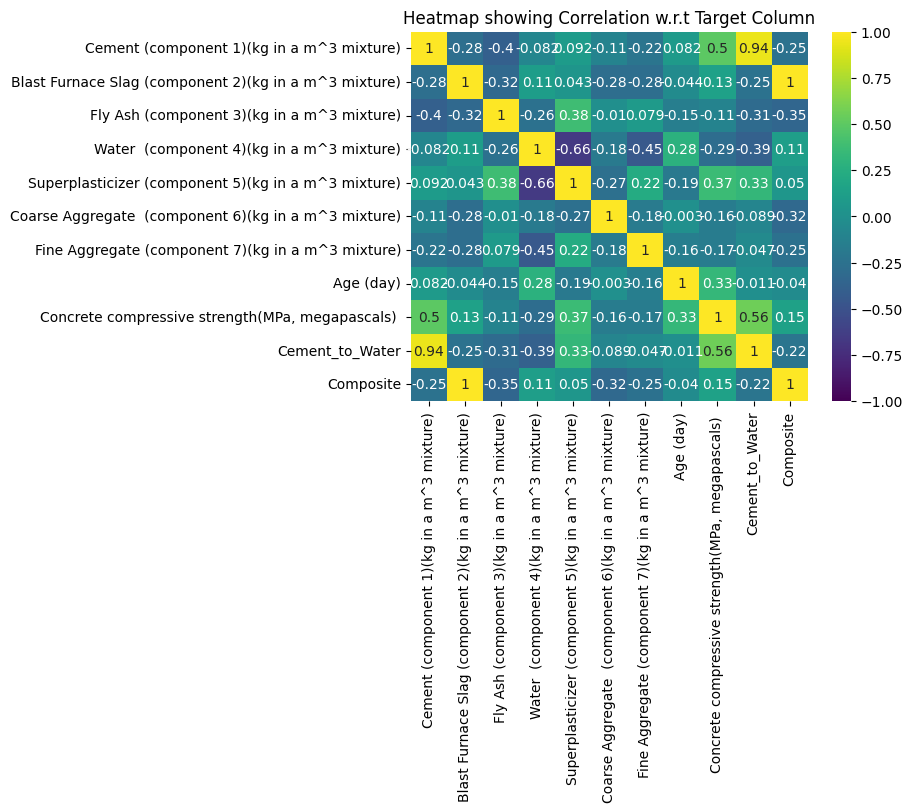

In [15]:
sns.heatmap(df.corr(),annot = True,center = 0 ,vmax =1,vmin = -1,cmap = 'viridis')
plt.title('Heatmap showing Correlation w.r.t Target Column')
plt.show()

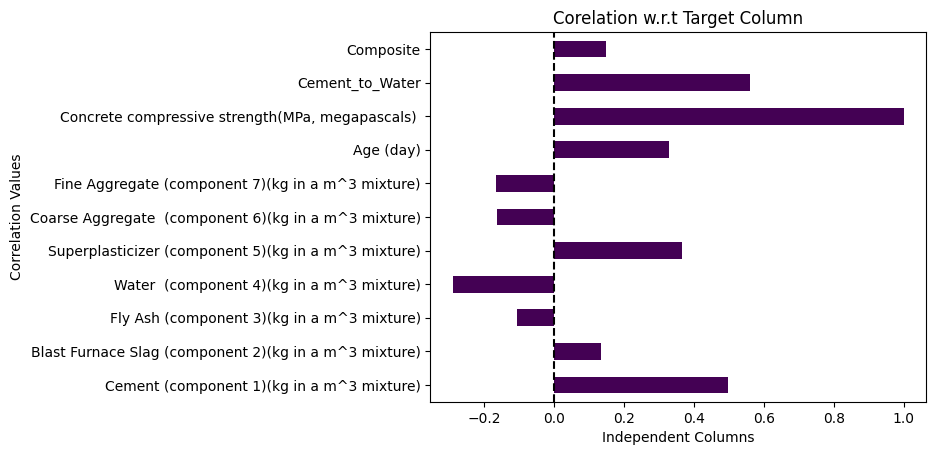

In [16]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'barh',cmap = 'viridis')
plt.axvline(0,linestyle = '--',color = 'black')
plt.title('Corelation w.r.t Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

## **Data Cleaning and Preprocessing**

In [17]:
# Checking Top Five Rows of Dataset
'''
1. As the dataset contains no categorical column, Hene No need of Converting Categorical column to Numerical Column.
2. No Missing Values Present in Given Dataset.
'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",Cement_to_Water,Composite
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,3.333333,0.000000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,3.333333,0.000000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1.458333,0.152897
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1.458333,0.152897
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,1.034375,0.135323


In [18]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) ', 'Cement_to_Water',
       'Composite'],
      dtype='object')

In [19]:
# Preventing Data Leackage

# Step 01: Split the Dataset into X and y
# Where X: Independent Columns and y: Depedent Column : Target Column
X = df.drop(columns = ['Concrete compressive strength(MPa, megapascals) ','Blast Furnace Slag (component 2)(kg in a m^3 mixture)','Fly Ash (component 3)(kg in a m^3 mixture)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)'],axis = 1)
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using Train Test Split
# test_size lies between 0.20 to 0.35
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state= 42)

#Step 03: Using Scaling Technique
sc = MinMaxScaler()

# Seen Data
X_train = sc.fit_transform(X_train)
# Unseen Data
X_test = sc.transform(X_test)

In [20]:
X_train.max(),X_train.min()

(np.float64(1.0000000000000002), np.float64(0.0))

## **Model Building**

In [21]:
# Linear Regression

from sklearn.linear_model import LinearRegression
# Fit model is always on training or seen dataset
LR = LinearRegression().fit(X_train,y_train)
# Prediction values are based on Unseen Data i.e.Test Data
y_pred_LR = LR.predict(X_test)
# y_test: actual value and y_pred_LR : Predicted value
print('Model Accuracy for Linear Regression',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression 0.5682881509342925


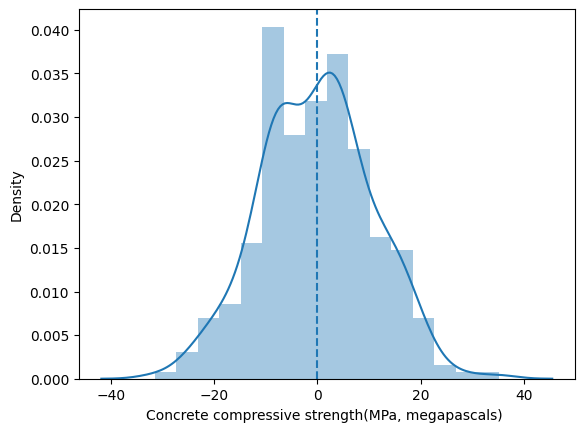

In [22]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle = '--')

Text(0, 0.5, 'Y_pred')

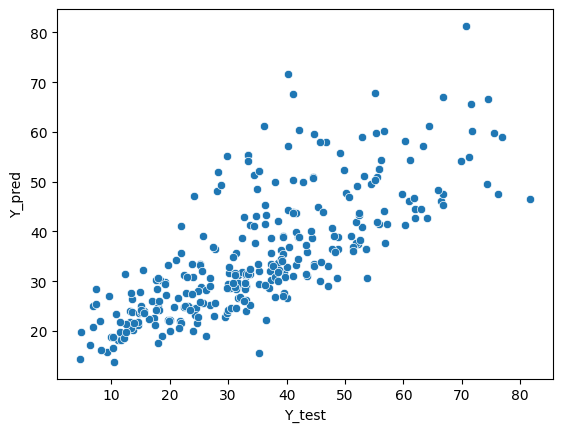

In [23]:
sns.scatterplot(x = y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

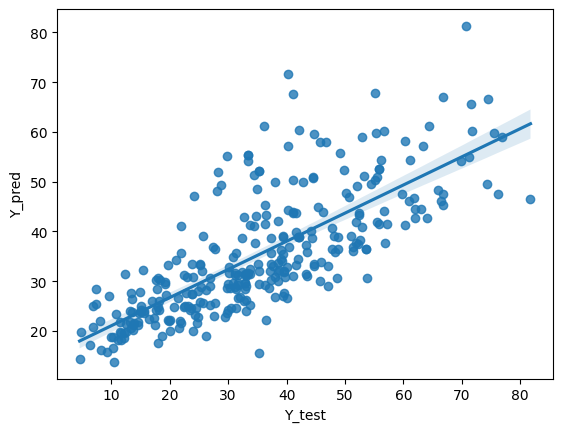

In [24]:
# Model Performance : Linear Regression
sns.regplot(x = y_test, y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [25]:
# Evaluate Coefficient
LR.coef_

array([ 53.62222023, -35.54586968,  21.07105276,  -5.25032316,
        39.56948668, -25.97626635,  22.97594022])

In [26]:
# Evaluate Constant Value
LR.intercept_

np.float64(28.2304855773938)

In [27]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for Decision Tree Regressor',r2_score(y_test,y_pred_DT))

The Model Accuracy for Decision Tree Regressor 0.828333611499672


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

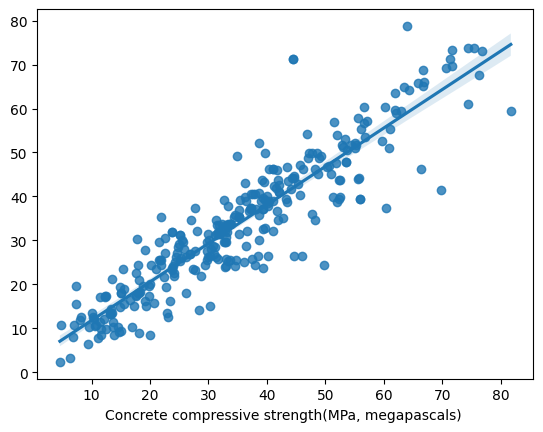

In [28]:
sns.regplot(x = y_test, y = y_pred_DT)

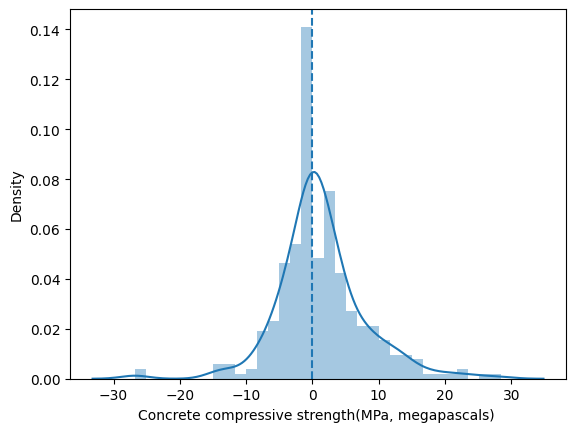

In [29]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0,linestyle = '--')

In [30]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('Model Accuracy for RandomForestRegressor',r2_score(y_test,y_pred_RF))


Model Accuracy for RandomForestRegressor 0.8858158203603903


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

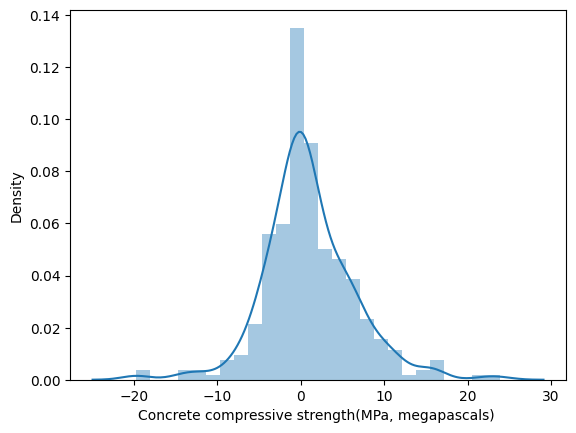

In [31]:
sns.distplot(y_test-y_pred_RF)

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

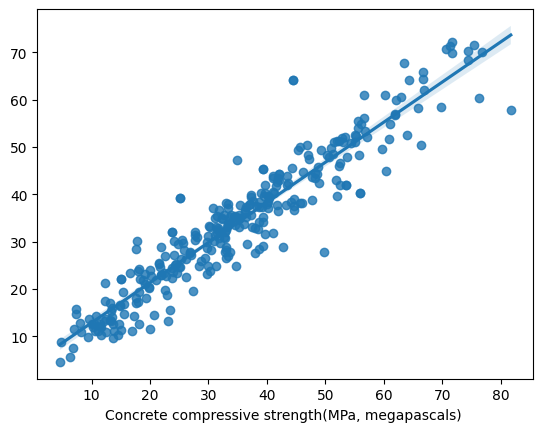

In [32]:
sns.regplot(x = y_test,y = y_pred_RF)

In [33]:
Features = RF.feature_importances_

In [34]:
feature_names = X.columns
importance_df = pd.Series(Features, index=feature_names)
importance_df

,0
Cement (component 1)(kg in a m^3 mixture),0.065486
Water (component 4)(kg in a m^3 mixture),0.036117
Superplasticizer (component 5)(kg in a m^3 mixture),0.049449
Fine Aggregate (component 7)(kg in a m^3 mixture),0.039297
Age (day),0.357081
Cement_to_Water,0.362469
Composite,0.090101


In [35]:
# Using Xgboost Algorithm

import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9140809280359221


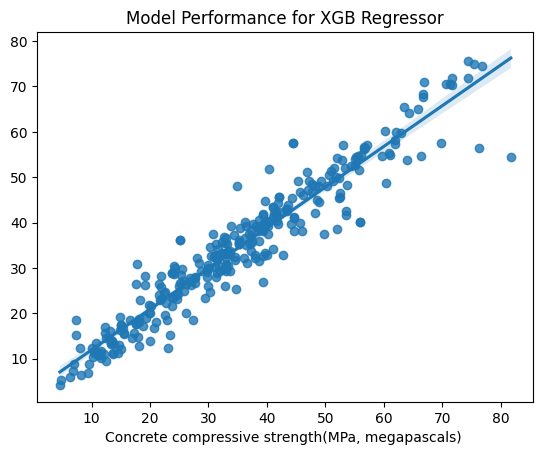

In [36]:
# Model Performance for XGB
sns.regplot(x = y_test, y = y_pred_xgb)
plt.title('Model Performance for XGB Regressor')
plt.show()

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

GRE = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GRE = GRE.predict(X_test)

print('Model Accuracy for GradientBoost Regressor',r2_score(y_test,y_pred_GRE))

Model Accuracy for GradientBoost Regressor 0.8908846827656915


In [38]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors = 3).fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

print('Model Accuracy for KNN Regressor',r2_score(y_test,y_pred_KNN))

Model Accuracy for KNN Regressor 0.6687847184913793


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
RF = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500,2000,5000],
    'max_depth': [None, 10, 20, 30,100,200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score on CV:", random_search.best_score_)